In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [63]:
import warnings
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

from statsmodels.graphics.gofplots import qqplot

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import jarque_bera
from scipy.stats import normaltest

from scipy import stats

from sqlalchemy import create_engine

from IPython.display import display_html

import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
warnings.filterwarnings("ignore")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "weatherinszeged"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
szeged_df = pd.read_sql_query("select * from weatherinszeged", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


szeged_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

In [80]:
warnings.filterwarnings("ignore")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
house_prices_df = pd.read_sql_query("select * from houseprices", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_prices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


<IPython.core.display.Javascript object>

# Szeged Data

In [42]:
X = szeged_df[["humidity", "windspeed", "windbearing", "pressure"]]
y = szeged_df["temperature"]

<IPython.core.display.Javascript object>

In [43]:
X_const = sm.add_constant(X)
lm_results = sm.OLS(y, X).fit()
lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            temperature   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.712
Method:                 Least Squares   F-statistic:                          5.950e+04
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                        0.00
Time:                        13:22:50   Log-Likelihood:                     -3.3991e+05
No. Observations:               96453   AIC:                                  6.798e+05
Df Residuals:                   96449   BIC:                                  6.799e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
humidity      -23.9965      0.126   -190.964      0.000     -24.243     -23.750
windspeed      -0.0460      0.004    -12.103      0.000      -0.053      -0.039
windbearing     0.0096      0.000     39.178      0.000       0.009       0.010
pressure        0.0278      0.000    252.540      0.000       0.028       0.028
==============================================================================
Omnibus:                     3331.234   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7796.776
Skew:                           0.191   Prob(JB):                         0.00
Kurtosis:                       4.339   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

### Linearity of the model in its coefficients

In [44]:
model = LinearRegression()
model.fit(X, y)

print("\nCoefficients: \n", model.coef_)
print("\nIntercept: \n", model.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285306


<IPython.core.display.Javascript object>

In [45]:
predictions = model.predict(X)
predictions.shape

(96453,)

<IPython.core.display.Javascript object>

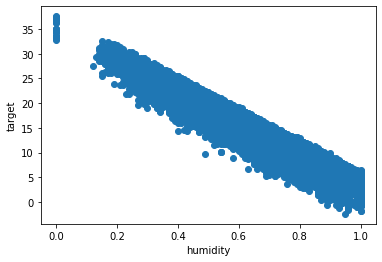

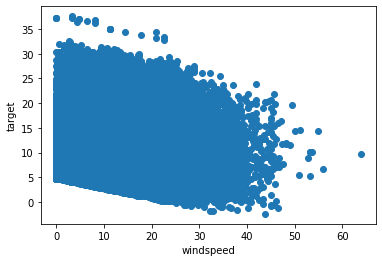

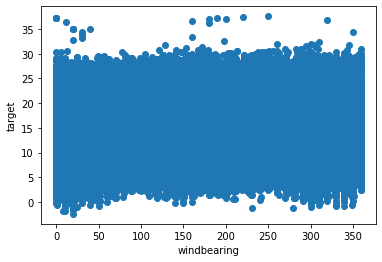

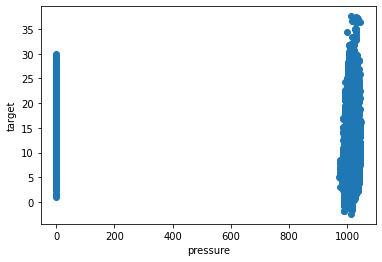

<IPython.core.display.Javascript object>

In [48]:
for col in X_train.columns:
    plt.scatter(X[col], predictions)
    plt.xlabel(col)
    plt.ylabel("target")
    plt.show()

### Error term should be zero on average

In [49]:
errors = y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -7.449232417867907e-16


<IPython.core.display.Javascript object>

### Homoscedasticty

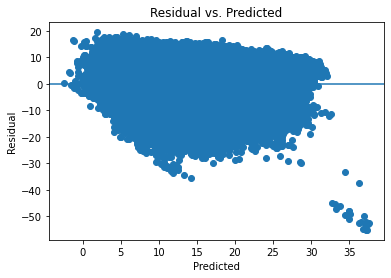

<IPython.core.display.Javascript object>

In [50]:
plt.scatter(predictions, errors)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [52]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print(
    "Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(
        bart_stats[0], bart_stats[1]
    )
)
print(
    "Levene test statistic value is {0:3g} and p value is {1:.3g}".format(
        lev_stats[0], lev_stats[1]
    )
)

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


<IPython.core.display.Javascript object>

In [55]:
_, lmp, _, fp = het_breuschpagan(lm_results.resid, X)
print(lmp)
print(fp)

0.0
0.0


<IPython.core.display.Javascript object>

Errors are heteroscedastic!

### Low multicollinearity

In [59]:
vifs = []
for i in range(X_train_const.shape[1]):
    vif = variance_inflation_factor(X_const.values, i)
    vifs.append(vif)

pd.Series(vifs, index=X_const.columns)

const          99.132308
humidity        1.053985
windspeed       1.067930
windbearing     1.011563
pressure        1.002508
dtype: float64

<IPython.core.display.Javascript object>

Variables are not collinear!

### Error terms should be uncorrelated with one another

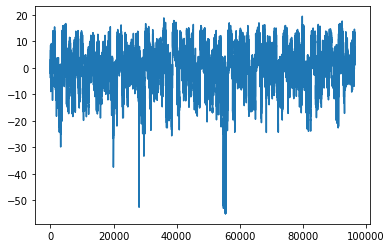

<IPython.core.display.Javascript object>

In [60]:
plt.plot(errors)
plt.show()

[1.         0.97035124 0.9553087  0.94116457 0.92603952 0.91242042
 0.89979506 0.887476   0.87647    0.86599514 0.85549583 0.84608609
 0.83739718 0.82848643 0.82047967 0.81292243 0.80525289 0.79838646
 0.79214658 0.78550952 0.77983216 0.77468981 0.76896947 0.76297119
 0.75602989 0.75115273 0.74498537 0.73918421 0.73287454 0.72747751
 0.7226405  0.71684414 0.71221382 0.70769778 0.70315359 0.69920983
 0.69536626 0.69129107 0.68822196 0.68548871 0.68206578]


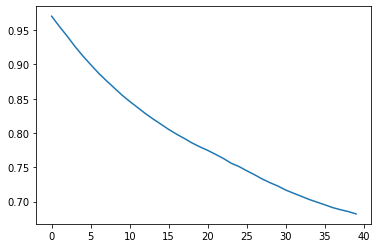

<IPython.core.display.Javascript object>

In [62]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

print(acf_data)

plt.plot(acf_data[1:])
plt.show()

Error terms are very correlated

### Features should not be correlated with errors. Normality of errors

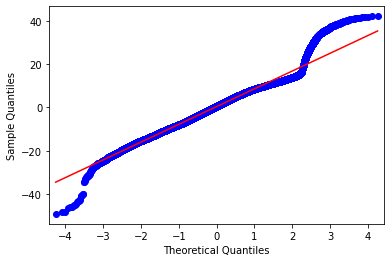

<IPython.core.display.Javascript object>

In [57]:
qqplot(lm_results.resid, line="s")
plt.show()

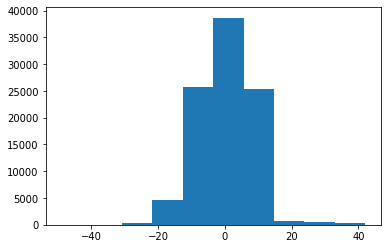

<IPython.core.display.Javascript object>

In [64]:
plt.hist(lm_results.resid)
plt.show()

In [66]:
stats.shapiro(lm_results.resid)

(0.9811355471611023, 0.0)

<IPython.core.display.Javascript object>

Errors are not normal!

# Houses Data

In [114]:
# Log transfrom dataframe
log_df = house_prices_df.copy()
log_df["log_saleprice"] = np.log(log_df["saleprice"])
log_df = log_df.drop(columns=["saleprice"])

<IPython.core.display.Javascript object>

In [115]:
corr_df = log_df.corr()[["log_saleprice"]]
corr_df.columns = ["corr"]
corr_df["abs_corr"] = corr_df.abs()
top_corrs = corr_df.sort_values("abs_corr", ascending=False).head(10)
top_corrs

,corr,abs_corr
log_saleprice,1.000000,1.000000
overallqual,0.817184,0.817184
grlivarea,0.700927,0.700927
garagecars,0.680625,0.680625
garagearea,0.650888,0.650888
totalbsmtsf,0.612134,0.612134
firstflrsf,0.596981,0.596981
fullbath,0.594771,0.594771
yearbuilt,0.586570,0.586570
yearremodadd,0.565608,0.565608


<IPython.core.display.Javascript object>

In [116]:
drop_ids = log_df.sort_values("firstflrsf", ascending=False).iloc[:4].index
log_df = log_df.drop(index=drop_ids)
print(f"Dropping house ids {list(drop_ids)}")

Dropping house ids [1298, 497, 523, 1024]


<IPython.core.display.Javascript object>

In [117]:
# Keep only top correlated columns
num_cols = log_df.select_dtypes("number").columns
keep_cols = top_corrs.index
drop_cols = [c for c in num_cols if c not in keep_cols]
log_df = log_df.drop(columns=drop_cols)
log_df

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagearea,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition,log_saleprice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,None,None,None,WD,Normal,12.247694
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,None,None,None,WD,Normal,12.109011
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,None,None,None,WD,Normal,12.317167
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,None,None,None,WD,Abnorml,11.849398
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,None,None,None,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,460,TA,TA,Y,None,None,None,WD,Normal,12.072541
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,500,TA,TA,Y,None,MnPrv,None,WD,Normal,12.254863
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,252,TA,TA,Y,None,GdPrv,Shed,WD,Normal,12.493130
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,240,TA,TA,Y,None,None,None,WD,Normal,11.864462


<IPython.core.display.Javascript object>

In [118]:
drop_cols = ["poolqc", "alley", "fence", "fireplacequ", "miscfeature"]
log_df = log_df.drop(columns=drop_cols)
log_df = log_df.dropna()

print(log_df.shape)
log_df.head()

(1334, 48)


,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,saletype,salecondition,log_saleprice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,548,TA,TA,Y,WD,Normal,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,460,TA,TA,Y,WD,Normal,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,608,TA,TA,Y,WD,Normal,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,642,TA,TA,Y,WD,Abnorml,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,836,TA,TA,Y,WD,Normal,12.429216


<IPython.core.display.Javascript object>

In [119]:
cat_cols = log_df.select_dtypes("O").copy()
anova_results = []
for col in cat_cols:
    groups = list(log_df[["log_saleprice", col]].groupby(col))
    samples = [group[1]["log_saleprice"] for group in groups]
    f, p = stats.f_oneway(*samples)

    anova_result = {"col": col, "f": f, "p": p}
    anova_results.append(anova_result)

anova_results_df = pd.DataFrame(anova_results).sort_values("f", ascending=False)
top_f = anova_results_df.head(10)
top_f

,col,f,p
17,exterqual,377.740953,2.028969e-177
20,bsmtqual,367.871889,6.259682e-174
29,kitchenqual,357.773677,2.576179e-170
32,garagefinish,308.943586,6.129839e-111
19,foundation,134.678353,1.206424e-96
27,centralair,112.458225,2.795646e-25
26,heatingqc,98.819205,1.103155e-73
16,masvnrtype,97.892638,2.972927e-57
31,garagetype,93.153739,3.450187e-84
0,mszoning,71.513596,6.552679e-55


<IPython.core.display.Javascript object>

In [120]:
cat_cols = log_df.select_dtypes("O").copy()[top_f["col"]]
cat_cols["log_saleprice"] = log_df["log_saleprice"]

tall_cat_cols = pd.melt(cat_cols, "log_saleprice")

<IPython.core.display.Javascript object>

In [121]:
print(log_df.shape)
log_df.head()

(1334, 48)


,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,saletype,salecondition,log_saleprice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,548,TA,TA,Y,WD,Normal,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,460,TA,TA,Y,WD,Normal,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,608,TA,TA,Y,WD,Normal,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,642,TA,TA,Y,WD,Abnorml,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,836,TA,TA,Y,WD,Normal,12.429216


<IPython.core.display.Javascript object>

In [122]:
cat_cols = log_df.select_dtypes("O").copy()
keep_cols = ["exterqual", "bsmtqual", "kitchenqual", "centralair"]
drop_cols = [c for c in cat_cols.columns if c not in keep_cols]

log_df = log_df.drop(columns=drop_cols)

<IPython.core.display.Javascript object>

In [123]:
# Encode centralair as binary
log_df["centralair"] = (log_df["centralair"] == "Y").astype(int)

<IPython.core.display.Javascript object>

In [124]:
# Encode qual columns as ordinal
quality_map = {"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
log_df[["exterqual", "bsmtqual", "kitchenqual"]] = log_df[
    ["exterqual", "bsmtqual", "kitchenqual"]
].replace(quality_map)

<IPython.core.display.Javascript object>

In [125]:
X = log_df.drop(columns=["log_saleprice"])
y = log_df["log_saleprice"]

<IPython.core.display.Javascript object>

In [126]:
X_const = sm.add_constant(X)
lm_results = sm.OLS(y, X).fit()
lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_saleprice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.165e+05
Date:                Wed, 08 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:13:39   Log-Likelihood:                          695.00
No. Observations:                1334   AIC:                                     -1364.
Df Residuals:                    1321   BIC:                                     -1296.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
overallqual      0.0681      0.005     12.508      0.000       0.057       0.079
yearbuilt        0.0022      0.000     10.356      0.000       0.002       0.003
yearremodadd     0.0033      0.000     16.196      0.000       0.003       0.004
exterqual        0.0005      0.012      0.047      0.963      -0.022       0.023
bsmtqual         0.0117      0.009      1.283      0.200      -0.006       0.030
totalbsmtsf      0.0002   2.59e-05      5.803      0.000    9.95e-05       0.000
centralair       0.1318      0.020      6.585      0.000       0.093       0.171
firstflrsf    5.053e-05   2.64e-05      1.915      0.056   -1.23e-06       0.000
grlivarea        0.0003   1.24e-05     26.357      0.000       0.000       0.000
fullbath        -0.0626      0.010     -5.982      0.000      -0.083      -0.042
kitchenqual      0.0174      0.009      1.851      0.064      -0.001       0.036
garagecars       0.0061      0.013      0.481      0.631      -0.019       0.031
garagearea       0.0001   4.05e-05      2.617      0.009    2.65e-05       0.000
==============================================================================
Omnibus:                      199.001   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.554
Skew:                          -0.707   Prob(JB):                    3.37e-152
Kurtosis:                       6.248   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

### Linearity of the model in its coefficients

In [127]:
model = LinearRegression()
model.fit(X, y)

print("\nCoefficients: \n", model.coef_)
print("\nIntercept: \n", model.intercept_)


Coefficients: 
 [ 7.06401458e-02  1.13666961e-03  1.60649175e-03  1.61232381e-02
  4.04672038e-02  1.44187160e-04  1.75659577e-01  4.69975945e-05
  2.94767938e-04 -3.77171697e-02  3.69021680e-02  1.82209040e-02
  1.08948669e-04]

Intercept: 
 5.0931812584512945


<IPython.core.display.Javascript object>

In [128]:
predictions = model.predict(X)
predictions.shape

(1334,)

<IPython.core.display.Javascript object>

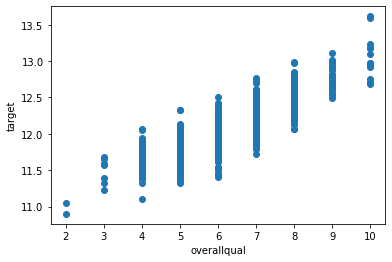

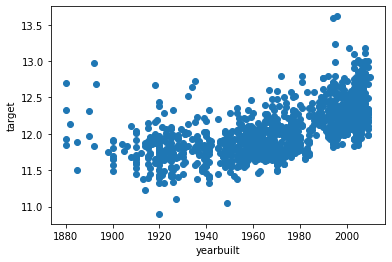

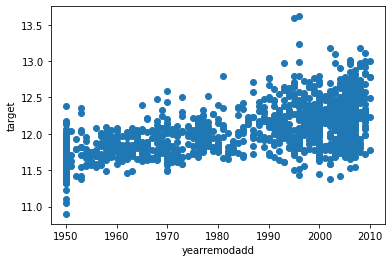

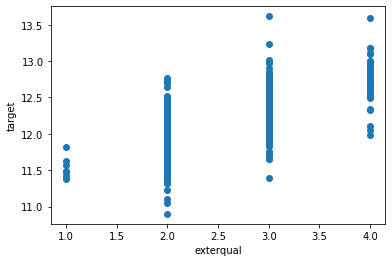

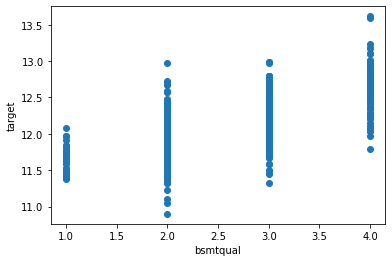

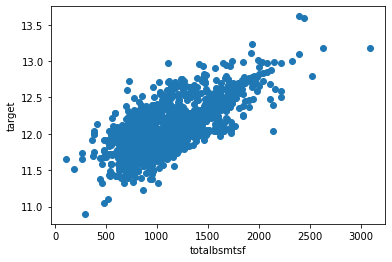

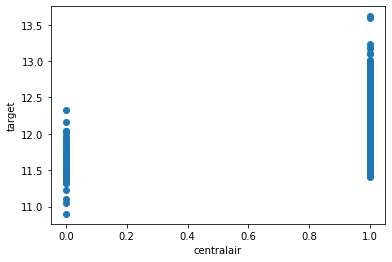

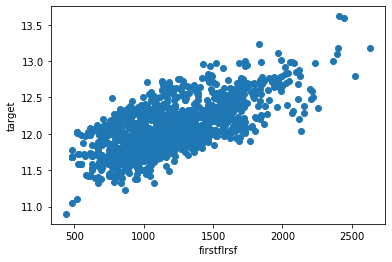

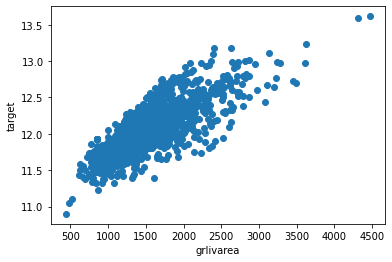

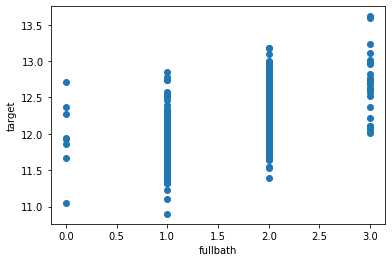

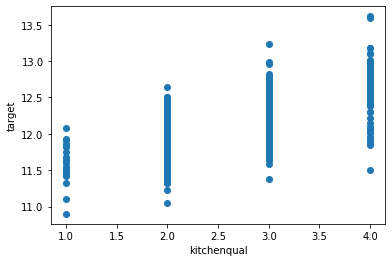

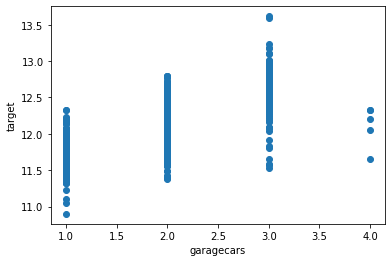

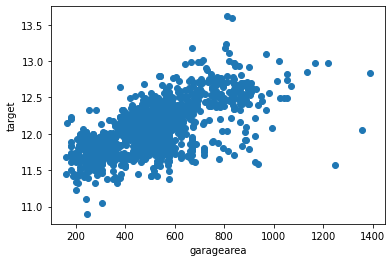

<IPython.core.display.Javascript object>

In [129]:
for col in X.columns:
    plt.scatter(X[col], predictions)
    plt.xlabel(col)
    plt.ylabel("target")
    plt.show()

### Error term should be zero on average

In [130]:
errors = y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.7390719881984461e-15


<IPython.core.display.Javascript object>

### Homoscedasticty

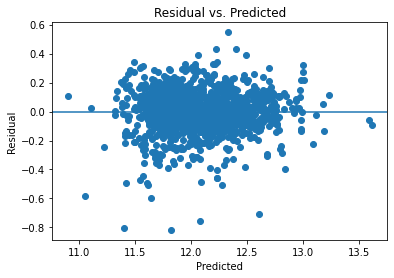

<IPython.core.display.Javascript object>

In [131]:
plt.scatter(predictions, errors)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [132]:
_, lmp, _, fp = het_breuschpagan(lm_results.resid, X)
print(lmp)
print(fp)

4.65787577854996e-47
9.466792251091481e-52


<IPython.core.display.Javascript object>

### Low multicollinearity

In [133]:
vifs = []
for i in range(X_const.shape[1]):
    vif = variance_inflation_factor(X_const.values, i)
    vifs.append(vif)

pd.Series(vifs, index=X_const.columns)

const           26493.563504
overallqual         3.290963
yearbuilt           3.330031
yearremodadd        2.251862
exterqual           2.905071
bsmtqual            2.890810
totalbsmtsf         5.986550
centralair          1.203138
firstflrsf          5.889841
grlivarea           2.683040
fullbath            2.270524
kitchenqual         2.569681
garagecars          4.138833
garagearea          3.590452
dtype: float64

<IPython.core.display.Javascript object>

### Error terms should be uncorrelated with one another

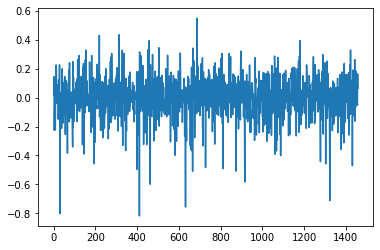

<IPython.core.display.Javascript object>

In [134]:
plt.plot(errors)
plt.show()

[ 1.         -0.00313732 -0.04388949 -0.01232925  0.00529949 -0.00992593
 -0.0054203  -0.02692625  0.00210151  0.03064736 -0.01485966 -0.02392346
  0.03601785 -0.04906885  0.01882523  0.03645457 -0.01926253  0.04410978
 -0.04275207  0.02274377 -0.00336974 -0.0269617  -0.03496444 -0.02987679
  0.04705137  0.03032164  0.03634654  0.01926049  0.017652   -0.04436826
 -0.02431292 -0.01672204  0.0242767  -0.03373002  0.020852    0.04905175
  0.03385516  0.00145868 -0.00492664  0.03820674 -0.00711824]


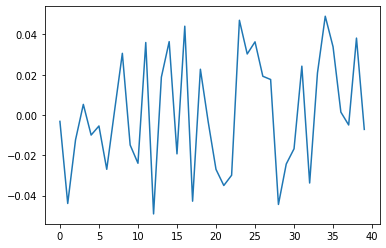

<IPython.core.display.Javascript object>

In [135]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

print(acf_data)

plt.plot(acf_data[1:])
plt.show()

### Features should not be correlated with errors. Normality of errors

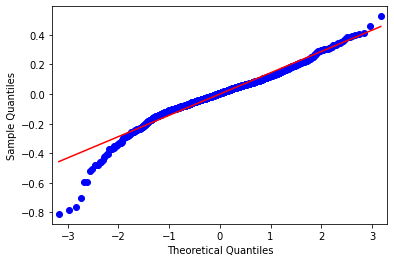

<IPython.core.display.Javascript object>

In [136]:
qqplot(lm_results.resid, line="s")
plt.show()

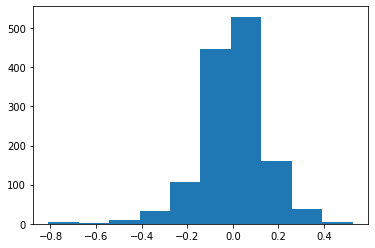

<IPython.core.display.Javascript object>

In [137]:
plt.hist(lm_results.resid)
plt.show()

In [112]:
stats.shapiro(lm_results.resid)

(0.9534739255905151, 3.6601136211860385e-20)

<IPython.core.display.Javascript object>